In [86]:
# Import necessary libraries
import pandas as pd
import numpy as np
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt

# Load Titanic dataset from Seaborn
titanic = sns.load_dataset('titanic')

# Display dataset information
print(titanic.info())
print(titanic.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  

In [87]:
# Check for missing values
print(titanic.isnull().sum())


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [88]:
# Fill missing values
titanic['age'].fillna(titanic['age'].mean(), inplace=True)  # Mean for numerical data
titanic['embarked'].fillna(titanic['embarked'].mode()[0], inplace=True)  # Mode for categorical data
titanic['embark_town'].fillna(titanic['embark_town'].mode()[0], inplace=True)

# Drop 'deck' column due to high missing value percentage
titanic.drop(columns=['deck'], inplace=True)

# Check again for missing values
print(titanic.isnull().sum())


survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64


C:\Users\USER\AppData\Local\Temp\ipykernel_39560\2753558658.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['age'].fillna(titanic['age'].mean(), inplace=True)  # Mean for numerical data
C:\Users\USER\AppData\Local\Temp\ipykernel_39560\2753558658.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values

In [89]:
# Check for duplicate rows
print(f"Number of duplicate rows: {titanic.duplicated().sum()}")

# Remove duplicate rows
titanic = titanic.drop_duplicates()

print(f"Number of duplicate rows: {titanic.duplicated().sum()}")


Number of duplicate rows: 111
Number of duplicate rows: 0


<function matplotlib.pyplot.show(close=None, block=None)>

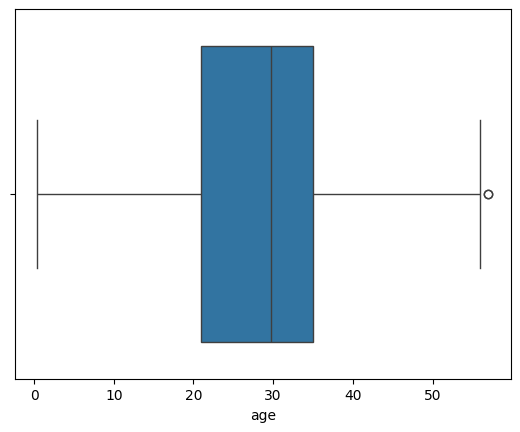

In [90]:
Q1 = titanic['age'].quantile(0.25)
Q3 = titanic['age'].quantile(0.75)
IQR = Q3 - Q1

# Define boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
titanic = titanic[(titanic['age'] >= lower_bound) & (titanic['age'] <= upper_bound)]

sns.boxplot(x='age', data=titanic)
plt.show


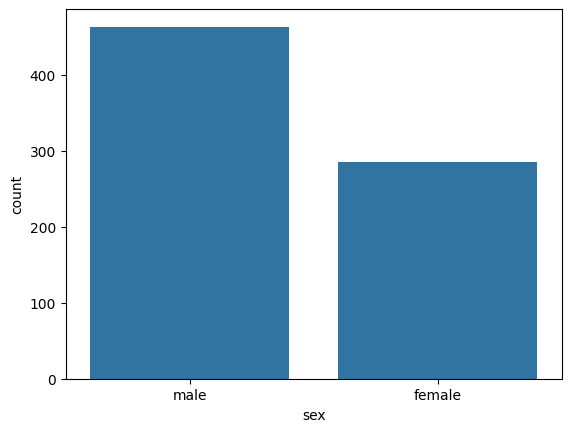

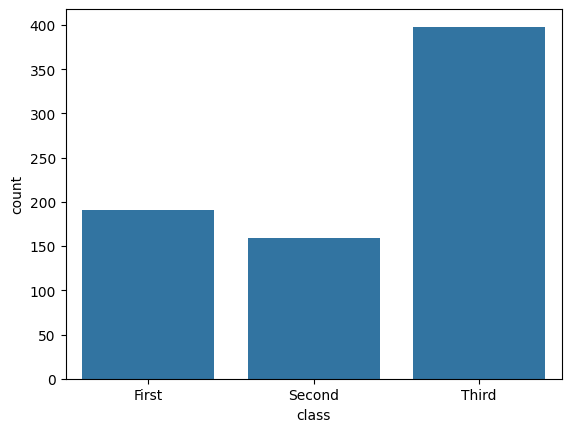

In [91]:
# Count plots for categorical features
sns.countplot(data=titanic, x='sex')
plt.show()

sns.countplot(data=titanic, x='class')
plt.show()


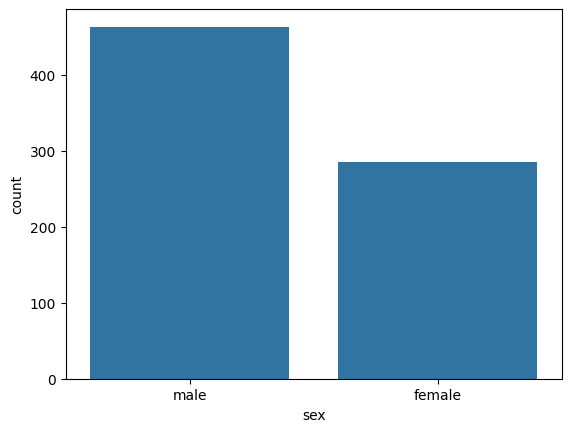

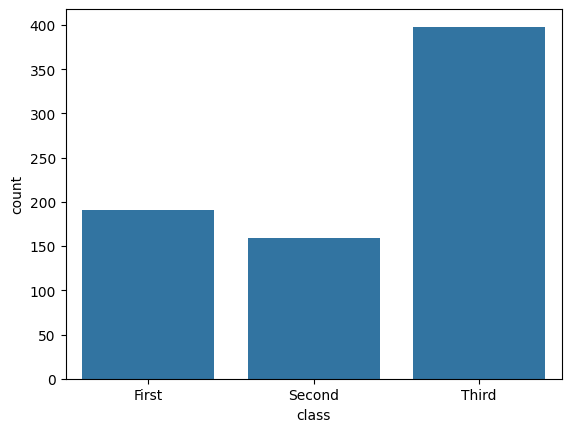

In [92]:
# Count plots for categorical features
sns.countplot(data=titanic, x='sex')
plt.show()

sns.countplot(data=titanic, x='class')
plt.show()


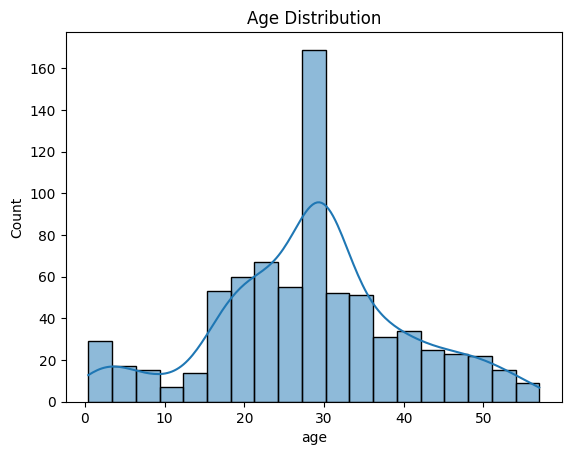

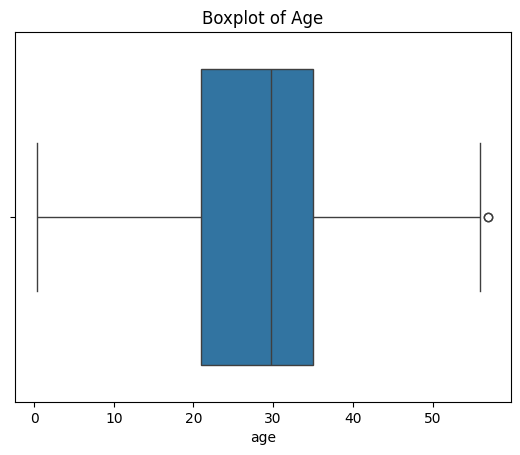

In [93]:
# Histogram and boxplot for numerical features
sns.histplot(titanic['age'], kde=True)
plt.title('Age Distribution')
plt.show()

sns.boxplot(x=titanic['age'])
plt.title('Boxplot of Age')
plt.show()


In [94]:
# Calculate Z-scores for the 'age' column
titanic['z_score_age'] = zscore(titanic['age'])
print(titanic['z_score_age'])
# Identify outliers
outliers_z = titanic[(titanic['z_score_age'] > 3) | (titanic['z_score_age'] < -3)]
print(f"Number of outliers detected using Z-score: {len(outliers_z)}")

# Remove outliers based on Z-score
titanic_z = titanic[(titanic['z_score_age'] <= 3) & (titanic['z_score_age'] >= -3)]


0     -0.530354
1      0.806582
2     -0.196120
3      0.555907
4      0.555907
         ...   
885    0.890141
887   -0.781029
888    0.112973
889   -0.196120
890    0.305231
Name: z_score_age, Length: 748, dtype: float64
Number of outliers detected using Z-score: 0


In [95]:
# Drop the Z-score column
titanic.drop(columns=['z_score_age'], inplace=True)

# Display the cleaned dataset
print(titanic.info())
print(titanic.head())


<class 'pandas.core.frame.DataFrame'>
Index: 748 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     748 non-null    int64   
 1   pclass       748 non-null    int64   
 2   sex          748 non-null    object  
 3   age          748 non-null    float64 
 4   sibsp        748 non-null    int64   
 5   parch        748 non-null    int64   
 6   fare         748 non-null    float64 
 7   embarked     748 non-null    object  
 8   class        748 non-null    category
 9   who          748 non-null    object  
 10  adult_male   748 non-null    bool    
 11  embark_town  748 non-null    object  
 12  alive        748 non-null    object  
 13  alone        748 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 72.4+ KB
None
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      

In [96]:
mapping = {True: 1, False: 0, "Yes": 1, "no": 0}
titanic[['alive', 'alone', 'adult_male']] = titanic[['alive', 'alone', 'adult_male']].applymap(mapping.get)


print(titanic)

     survived  pclass     sex        age  sibsp  parch     fare embarked  \
0           0       3    male  22.000000      1      0   7.2500        S   
1           1       1  female  38.000000      1      0  71.2833        C   
2           1       3  female  26.000000      0      0   7.9250        S   
3           1       1  female  35.000000      1      0  53.1000        S   
4           0       3    male  35.000000      0      0   8.0500        S   
..        ...     ...     ...        ...    ...    ...      ...      ...   
885         0       3  female  39.000000      0      5  29.1250        Q   
887         1       1  female  19.000000      0      0  30.0000        S   
888         0       3  female  29.699118      1      2  23.4500        S   
889         1       1    male  26.000000      0      0  30.0000        C   
890         0       3    male  32.000000      0      0   7.7500        Q   

     class    who  adult_male  embark_town  alive  alone  
0    Third    man           

C:\Users\USER\AppData\Local\Temp\ipykernel_39560\1754642687.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  titanic[['alive', 'alone', 'adult_male']] = titanic[['alive', 'alone', 'adult_male']].applymap(mapping.get)


In [97]:
print(titanic.isna().sum())

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
embark_town      0
alive          312
alone            0
dtype: int64


In [98]:
titanic['alive'].fillna(titanic['alive'].mode().iloc[0], inplace=True)


C:\Users\USER\AppData\Local\Temp\ipykernel_39560\1200970079.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['alive'].fillna(titanic['alive'].mode().iloc[0], inplace=True)


In [99]:
print(titanic)

     survived  pclass     sex        age  sibsp  parch     fare embarked  \
0           0       3    male  22.000000      1      0   7.2500        S   
1           1       1  female  38.000000      1      0  71.2833        C   
2           1       3  female  26.000000      0      0   7.9250        S   
3           1       1  female  35.000000      1      0  53.1000        S   
4           0       3    male  35.000000      0      0   8.0500        S   
..        ...     ...     ...        ...    ...    ...      ...      ...   
885         0       3  female  39.000000      0      5  29.1250        Q   
887         1       1  female  19.000000      0      0  30.0000        S   
888         0       3  female  29.699118      1      2  23.4500        S   
889         1       1    male  26.000000      0      0  30.0000        C   
890         0       3    male  32.000000      0      0   7.7500        Q   

     class    who  adult_male  embark_town  alive  alone  
0    Third    man           

# Feature Engineering

age_group
Young Adult    433
Adult          180
Child           68
Teenager        67
Name: count, dtype: int64


<Axes: xlabel='age_group', ylabel='count'>

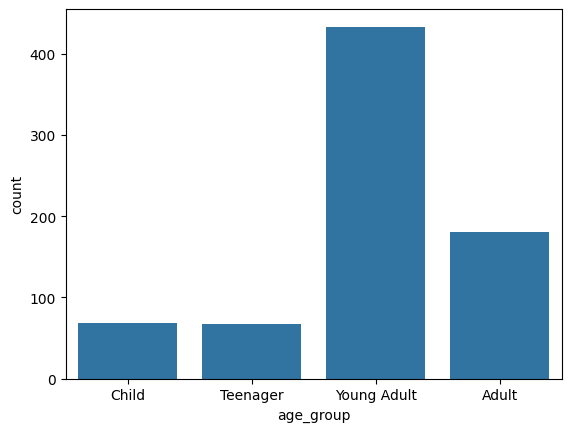

In [100]:
# Create age groups
bins = [0, 12, 18, 35, 60]
labels = ['Child', 'Teenager', 'Young Adult', 'Adult']
titanic['age_group'] = pd.cut(titanic['age'], bins=bins, labels=labels)
print(titanic['age_group'].value_counts())
sns.countplot(data=titanic,x='age_group')

In [101]:
print(titanic['embark_town'].value_counts())

embark_town
Southampton    545
Cherbourg      147
Queenstown      56
Name: count, dtype: int64


<Axes: xlabel='embark_town', ylabel='count'>

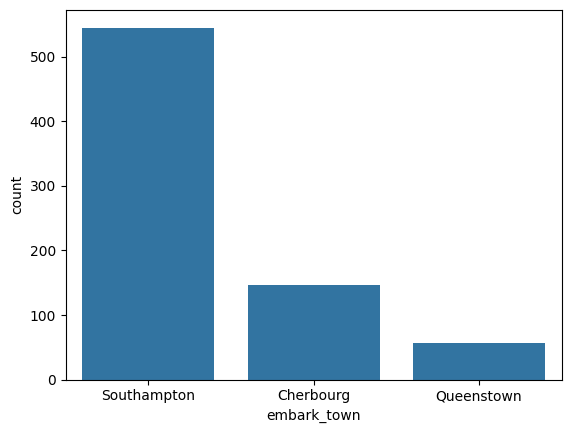

In [102]:
sns.countplot(x=titanic['embark_town'])

In [103]:
# Create a new feature 'family_size'
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1


In [104]:
# Extract title from name
# Example: Mr., Mrs., Miss, etc.
if 'name' in titanic.columns:
    titanic['title'] = titanic['name'].str.extract(' ([A-Za-z]+)\.')


In [105]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
titanic['sex'] = label_encoder.fit_transform(titanic['sex'])
titanic['embarked'] = label_encoder.fit_transform(titanic['embarked'])

In [106]:
# One-hot encode categorical features
titanic = pd.get_dummies(titanic, columns=['class', 'age_group'], drop_first=True)


In [107]:
print(titanic)

     survived  pclass  sex        age  sibsp  parch     fare  embarked    who  \
0           0       3    1  22.000000      1      0   7.2500         2    man   
1           1       1    0  38.000000      1      0  71.2833         0  woman   
2           1       3    0  26.000000      0      0   7.9250         2  woman   
3           1       1    0  35.000000      1      0  53.1000         2  woman   
4           0       3    1  35.000000      0      0   8.0500         2    man   
..        ...     ...  ...        ...    ...    ...      ...       ...    ...   
885         0       3    0  39.000000      0      5  29.1250         1  woman   
887         1       1    0  19.000000      0      0  30.0000         2  woman   
888         0       3    0  29.699118      1      2  23.4500         2  woman   
889         1       1    1  26.000000      0      0  30.0000         0    man   
890         0       3    1  32.000000      0      0   7.7500         1    man   

     adult_male  embark_tow

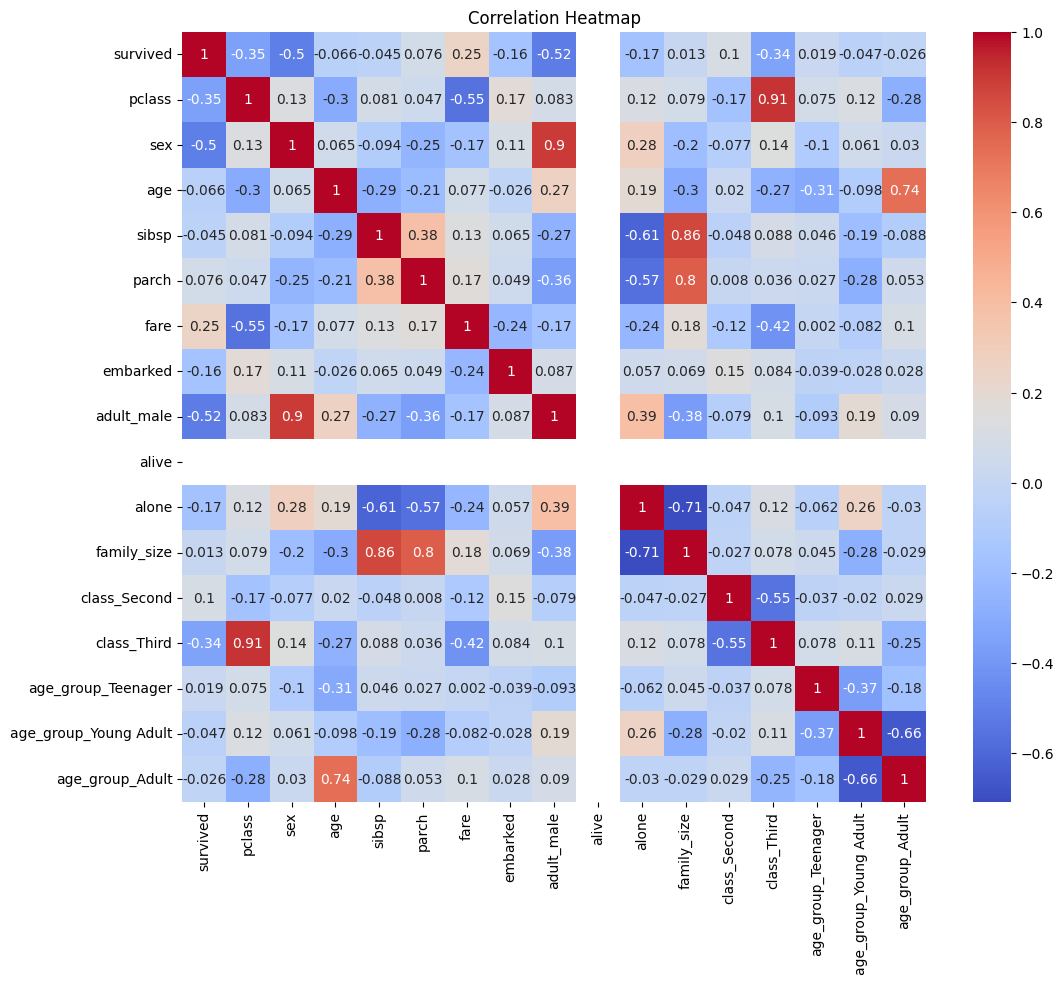

In [108]:
# Heatmap for numerical features
corr = titanic.corr(numeric_only=True)
plt.figure(figsize =(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


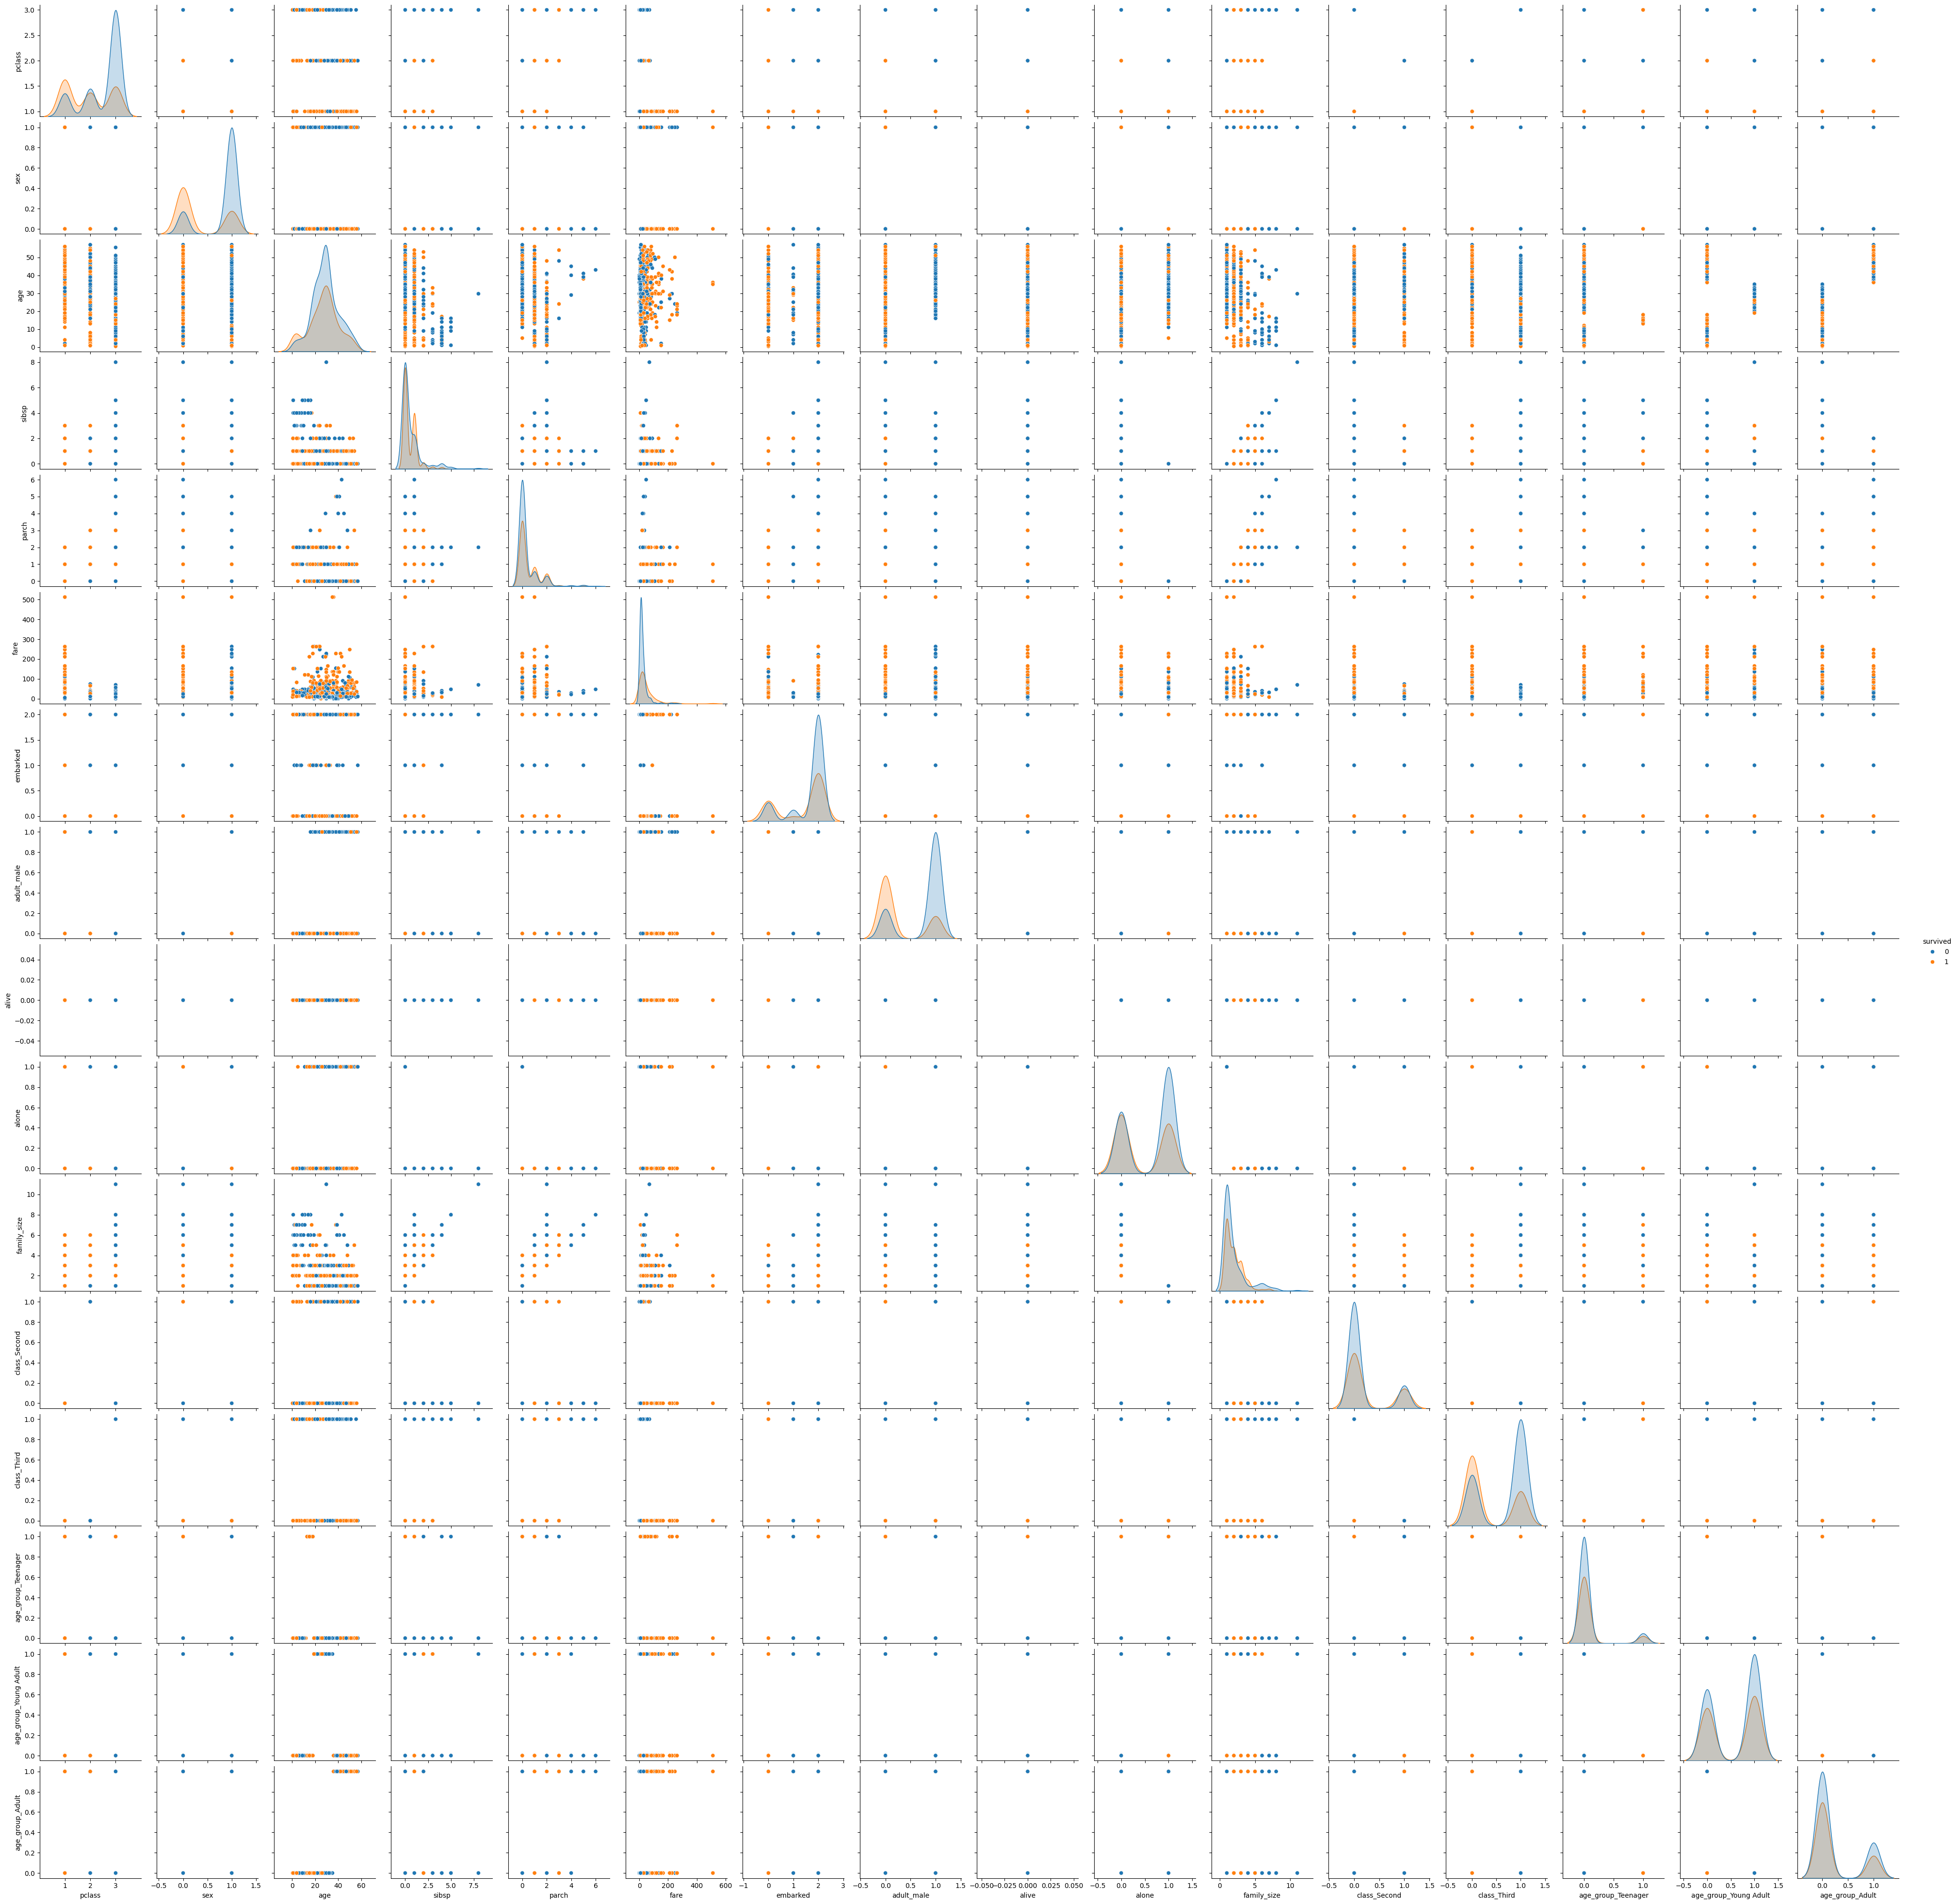

In [109]:
# Pairplot for relationships
sns.pairplot(titanic, hue='survived')
plt.show()


In [110]:
# Standardize numerical columns
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
titanic[['age', 'fare']] = scaler.fit_transform(titanic[['age', 'fare']])


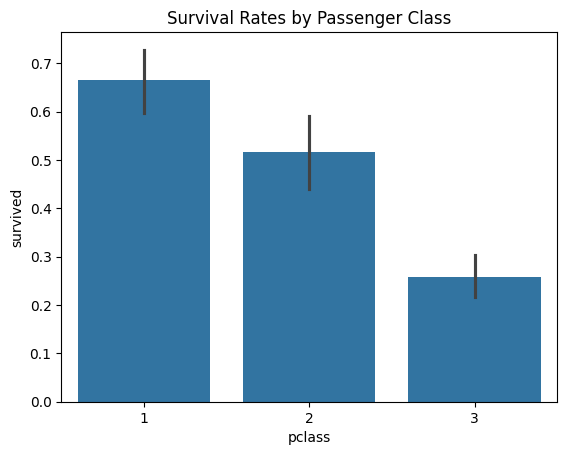

In [114]:
sns.barplot(data=titanic, x='pclass', y='survived')
plt.title('Survival Rates by Passenger Class')
plt.show()


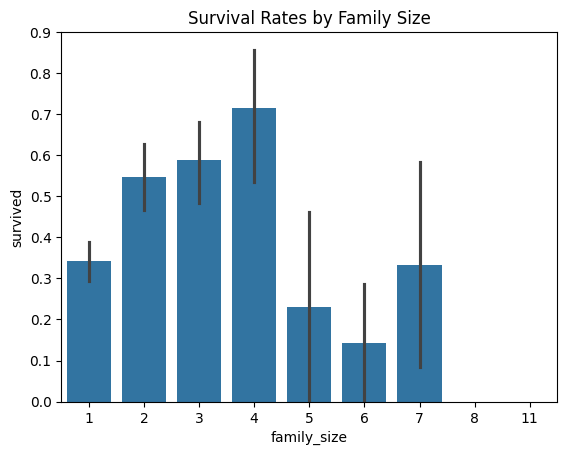

In [115]:
sns.barplot(data=titanic, x='family_size', y='survived')
plt.title('Survival Rates by Family Size')
plt.show()


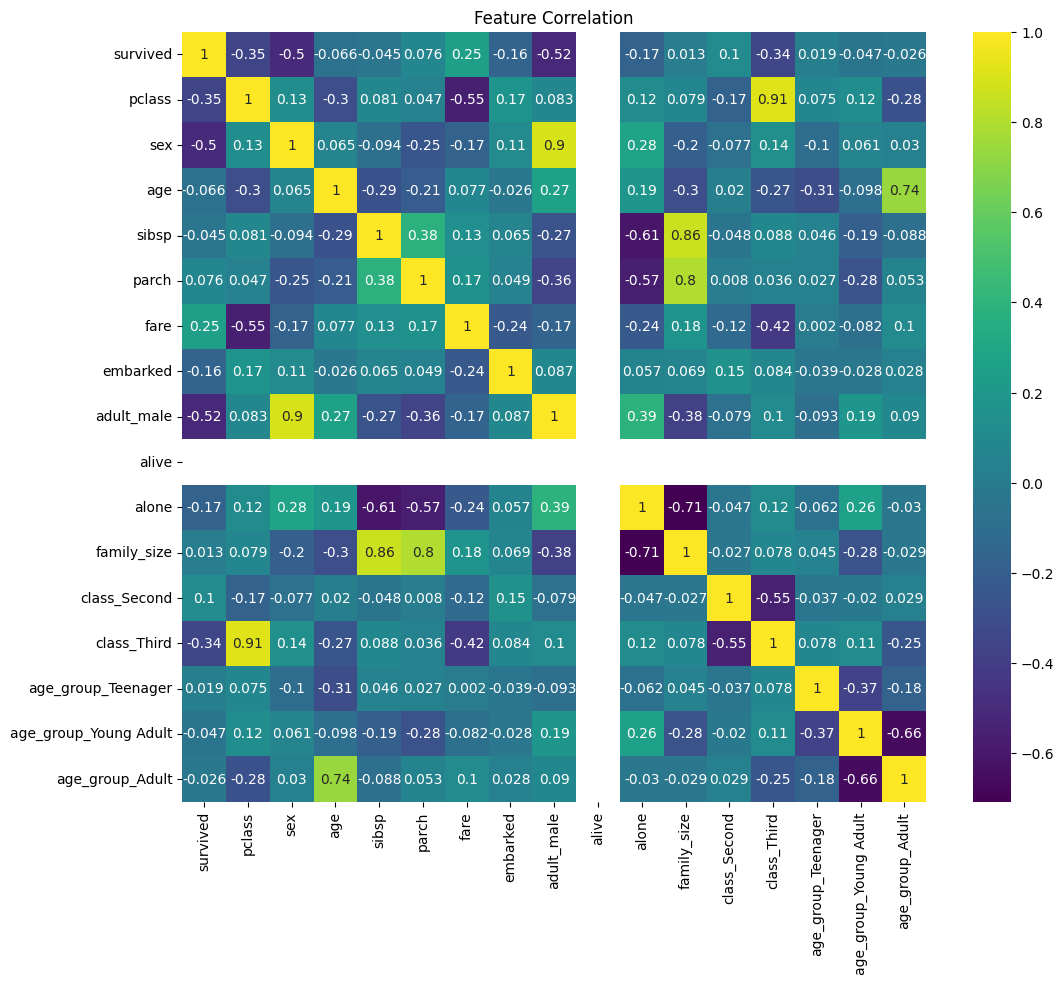

In [119]:
plt.figure(figsize=(12,10))
sns.heatmap(titanic.corr(numeric_only=True), annot=True, cmap='viridis')
plt.title('Feature Correlation')
plt.show()


In [120]:
# Save the cleaned and preprocessed dataset
titanic.to_csv('titanic_cleaned.csv', index=False)
